In [38]:
from keras.layers import Input, Dense, Lambda,Flatten
from keras.models import Model 
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import cv2 as cv
import os
import os.path

In [39]:
img_size=[224,224]

In [40]:
file_name="Lung_cancer_imageDatset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [41]:
train_path='/content/Data/train'
valid_path='/content/Data/valid'

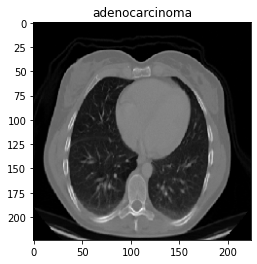

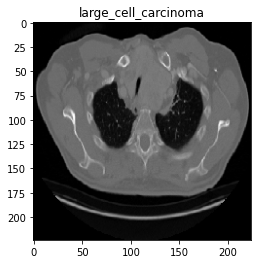

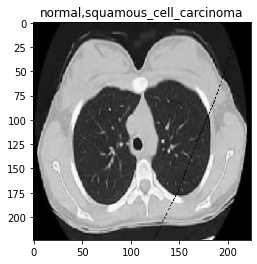

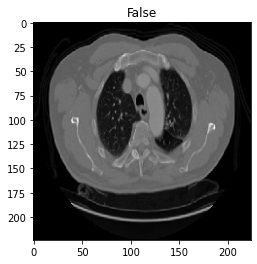

In [42]:
adenocarcinoma='/content/Data/test/adenocarcinoma/000108 (3).png'
large_cell_carcinoma='/content/Data/test/large.cell.carcinoma/000108.png'
normal='/content/Data/test/normal/10 (2) - Copy.png'
squamous_cell_carcinoma='/content/Data/test/squamous.cell.carcinoma/000108 (6).png'

links=[adenocarcinoma,large_cell_carcinoma,normal,squamous_cell_carcinoma]
titles=['adenocarcinoma','large_cell_carcinoma','normal,squamous_cell_carcinoma']

for i in links:
  img=image.load_img(i,target_size=img_size)
  plt.imshow(img)
  plt.title(titles.pop(0) if titles else False)
  plt.show()

In [43]:
vgg=VGG16(input_shape=img_size+[3],weights='imagenet',include_top=False)
for layers in vgg.layers:
  layers.trainable=False

In [44]:
x=Flatten()(vgg.output)
prediction=Dense(4,activation='softmax')(x)

In [45]:
model=Model(inputs=vgg.input,outputs=prediction)

In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
train=ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',
                         
                               )

training_data=train.flow_from_directory(train_path,
                                       target_size=[224,224],
                                       batch_size=50,
                                       class_mode="categorical")

validation=ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

validation_data=train.flow_from_directory(valid_path,
                                       target_size=[224,224],
                                       batch_size=50,
                                       class_mode='categorical',
                                      
                                       )

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [49]:
training_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [50]:
r=model.fit_generator(training_data,validation_data=validation_data,
                                epochs=100,steps_per_epoch=len(training_data),
                                validation_steps=len(validation_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
13/13 [==============================] - 13s 1s/step - loss: 1.7778 - accuracy: 0.3654 - val_loss: 1.1068 - val_accuracy: 0.5000
Epoch 2/100
13/13 [==============================] - 10s 749ms/step - loss: 0.8681 - accuracy: 0.6264 - val_loss: 0.9719 - val_accuracy: 0.4722
Epoch 3/100
13/13 [==============================] - 10s 752ms/step - loss: 0.7286 - accuracy: 0.6835 - val_loss: 0.8098 - val_accuracy: 0.6389
Epoch 4/100
13/13 [==============================] - 10s 755ms/step - loss: 0.5838 - accuracy: 0.7635 - val_loss: 0.7240 - val_accuracy: 0.7083
Epoch 5/100
13/13 [==============================] - 10s 808ms/step - loss: 0.4286 - accuracy: 0.8548 - val_loss: 0.7233 - val_accuracy: 0.7083
Epoch 6/100
13/13 [==============================] - 10s 753ms/step - loss: 0.4089 - accuracy: 0.8483 - val_loss: 0.6313 - val_accuracy: 0.7361
Epoch 7/100
13/13 [==============================] - 10s 761ms/step - loss: 0.3370 - accuracy: 0.8891 - val_loss: 0.7172 - val_accuracy: 0.

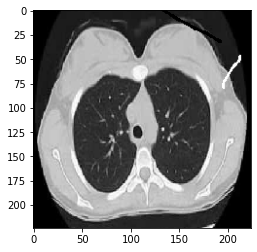

normal


In [55]:
image_path='/content/Data/test/normal/10 - Copy (2) - Copy.png'
img_plot=image.load_img(image_path,target_size=(224,224))
plt.imshow(img_plot)
plt.show()

X=image.img_to_array(img_plot)
X=np.expand_dims(X,axis=0)
test=model.predict(X)
if np.argmax(test)==0:
  print("adenocarcinoma")
elif np.argmax(test)==1:
  print("large.cell.carcinoma")
elif np.argmax(test)==2:
  print("normal")
else:
  print("squamous.cell.carcinoma")

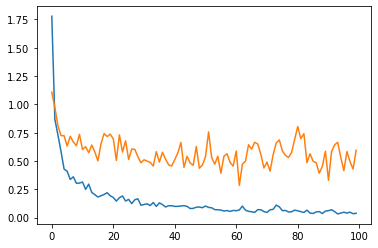

In [52]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()

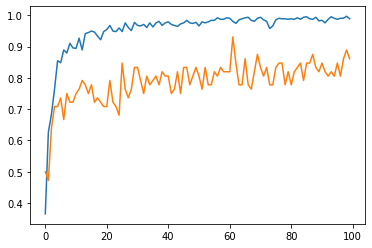

In [53]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.show()